In [1]:
import geopandas as gpd

In [3]:
boroughs = gpd.read_file("../data/boroughs.geojson")

In [4]:
boroughs

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623853e+09,330385.03697,(POLYGON ((-74.05050806403247 40.5664220341608...
1,4,Queens,3.049947e+09,861038.47930,(POLYGON ((-73.83668274106708 40.5949466970158...
2,3,Brooklyn,1.959432e+09,726568.94634,(POLYGON ((-73.8670614947212 40.58208797679338...
3,1,Manhattan,6.364422e+08,358532.95642,(POLYGON ((-74.01092841268033 40.6844914725429...
4,2,Bronx,1.186804e+09,464517.89055,(POLYGON ((-73.89680883223775 40.7958084451597...


In [5]:
import shapely

In [8]:
shapely.ops.triangulate

<function shapely.ops.triangulate>

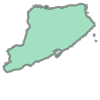

In [10]:
boroughs.iloc[0]['geometry']

In [12]:
si_triangles = shapely.ops.triangulate(boroughs.iloc[0]['geometry'])

In [18]:
len(si_triangles)

17974

In [22]:
gpd.GeoSeries(si_triangles)

0        POLYGON ((-74.24803463735695 40.5430932404414,...
1        POLYGON ((-74.24803463735695 40.5430932404414,...
2        POLYGON ((-74.24803463735695 40.5430932404414,...
3        POLYGON ((-74.24803463735695 40.5430932404414,...
4        POLYGON ((-74.24803463735695 40.5430932404414,...
5        POLYGON ((-74.24803463735695 40.5430932404414,...
6        POLYGON ((-74.24803463735695 40.5430932404414,...
7        POLYGON ((-74.24803463735695 40.5430932404414,...
8        POLYGON ((-74.24803463735695 40.5430932404414,...
9        POLYGON ((-74.24803463735695 40.5430932404414,...
10       POLYGON ((-74.24803463735695 40.5430932404414,...
11       POLYGON ((-74.24803463735695 40.5430932404414,...
12       POLYGON ((-74.24803463735695 40.5430932404414,...
13       POLYGON ((-74.24803463735695 40.5430932404414,...
14       POLYGON ((-74.24803463735695 40.5430932404414,...
15       POLYGON ((-74.24803463735695 40.5430932404414,...
16       POLYGON ((-74.24803463735695 40.5430932404414,.

Too adventurous. Many of these triangles are super-thin slivers. cf:

* http://stackoverflow.com/questions/240778/random-points-inside-a-polygon
* http://mathworld.wolfram.com/TrianglePointPicking.html
* https://github.com/Toblerity/Shapely/blob/master/docs/code/triangulate.py

In [24]:
si = boroughs.iloc[0]['geometry']
si_bb = si.bounds

And so on.

In [25]:
si_bb

(-74.25559136315215, 40.49611539517034, -74.04923629842045, 40.64892555177346)

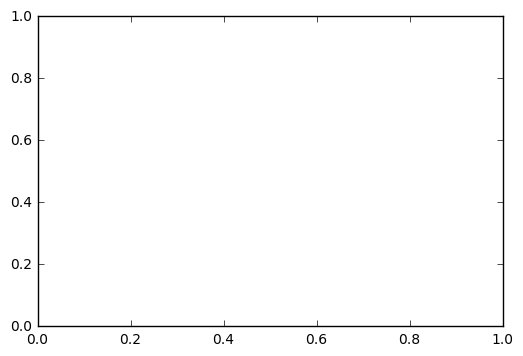

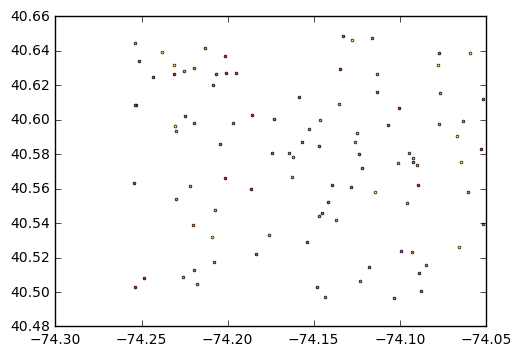

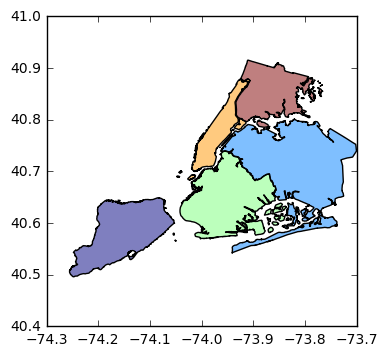

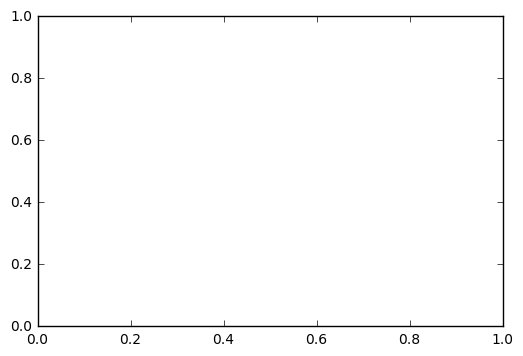

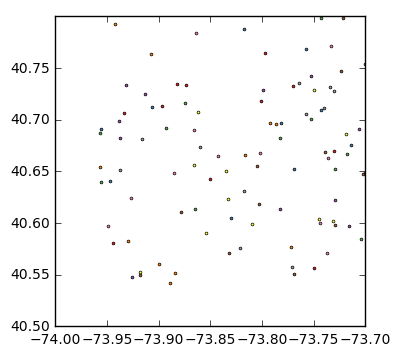

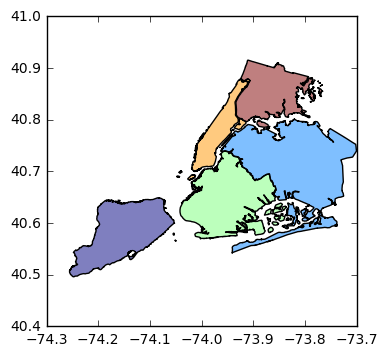

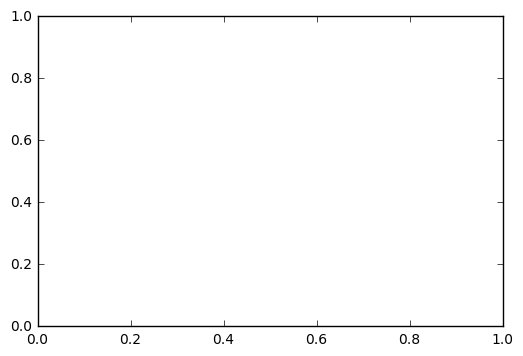

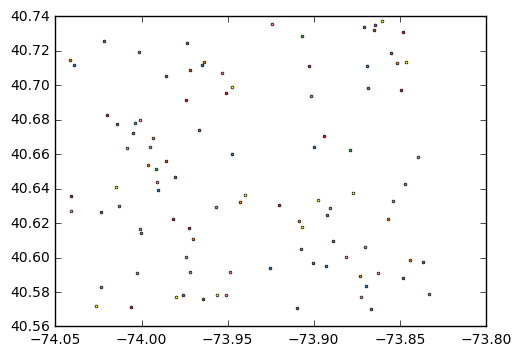

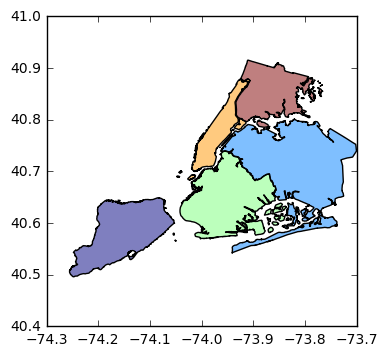

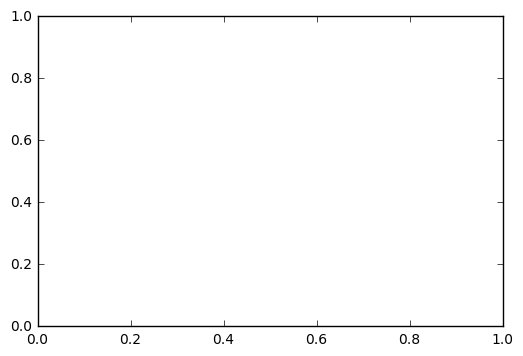

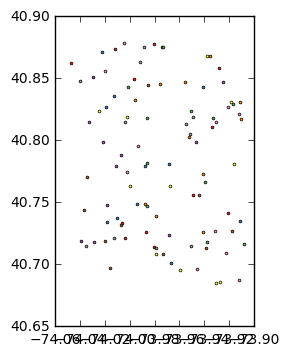

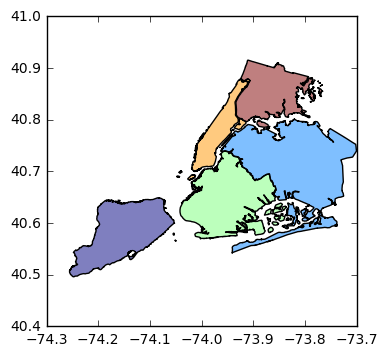

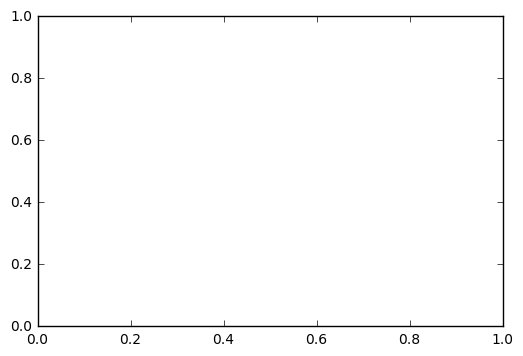

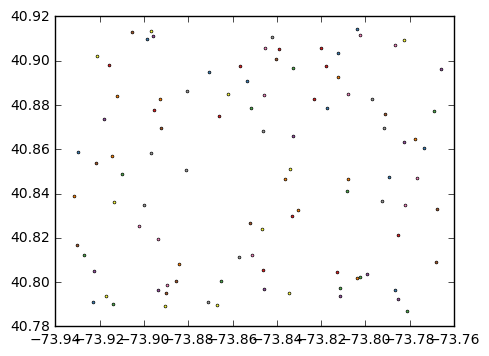

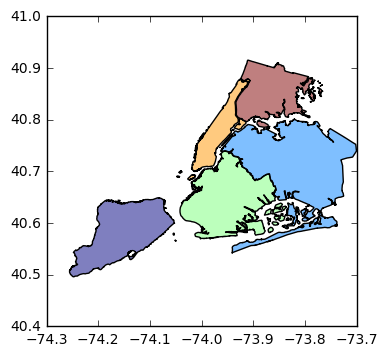

In [54]:
import random
import time
%matplotlib inline
import mplleaflet
import matplotlib.pyplot as plt

point_lists = []

for i in range(len(boroughs)):
    b = boroughs.iloc[i]['BoroName']
    geo = boroughs.iloc[i]['geometry']
    b_bb = geo.bounds
    point_lists.append([])
#     while True:
#         r_lat = b_bb[1] + random.random() * (b_bb[3] - b_bb[1])
#         r_long = b_bb[0] + random.random() * (b_bb[2] - b_bb[0])
# #         print(r_long, r_lat)
# #         time.sleep(1)
#         if geo.contains(shapely.geometry.Point(r_lat, r_long)):
#             point_lists[i].append((r_long, r_lat))
#             if len(point_lists) >= 5:
#                 break
    points = []
    while len(points) < 100:
        r_lat = b_bb[1] + random.random() * (b_bb[3] - b_bb[1])
        r_long = b_bb[0] + random.random() * (b_bb[2] - b_bb[0])
        points.append(shapely.geometry.Point(r_long, r_lat))
    plt.hold(True)
    gpd.GeoSeries(points).plot()
    boroughs.plot()
    plt.show()

In [59]:
b = boroughs.iloc[0]['BoroName']
geo = boroughs.iloc[0]['geometry']
b_bb = geo.bounds
point_lists.append([])
points = []
while len(points) < 100:
    r_lat = b_bb[1] + random.random() * (b_bb[3] - b_bb[1])
    r_long = b_bb[0] + random.random() * (b_bb[2] - b_bb[0])
    points.append(shapely.geometry.Point(r_long, r_lat))
gpd.GeoSeries(points).plot()
mplleaflet.show()
boroughs.plot()
mplleaflet.show()

In [63]:
[geo.contains(points[i]) for i in range(len(points))]

[False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False]

Staten Island

In [74]:
b = boroughs.iloc[0]['BoroName']
geo = boroughs.iloc[0]['geometry']
b_bb = geo.bounds
point_lists.append([])
points = []
while len(points) < 10000:
    r_lat = b_bb[1] + random.random() * (b_bb[3] - b_bb[1])
    r_long = b_bb[0] + random.random() * (b_bb[2] - b_bb[0])
    if geo.contains(shapely.geometry.Point(r_long, r_lat)):
        points.append(shapely.geometry.Point(r_long, r_lat))

In [75]:
gpd.GeoSeries(points).plot()
mplleaflet.show()

In [79]:
gpd.GeoSeries(points).to_file('../data/10000_points_staten_island.geojson', driver='GeoJSON')

Queens

In [80]:
b = boroughs.iloc[1]['BoroName']
geo = boroughs.iloc[1]['geometry']
b_bb = geo.bounds
point_lists.append([])
points = []
while len(points) < 10000:
    r_lat = b_bb[1] + random.random() * (b_bb[3] - b_bb[1])
    r_long = b_bb[0] + random.random() * (b_bb[2] - b_bb[0])
    if geo.contains(shapely.geometry.Point(r_long, r_lat)):
        points.append(shapely.geometry.Point(r_long, r_lat))

In [81]:
gpd.GeoSeries(points).plot()
mplleaflet.show()

What this looks like:

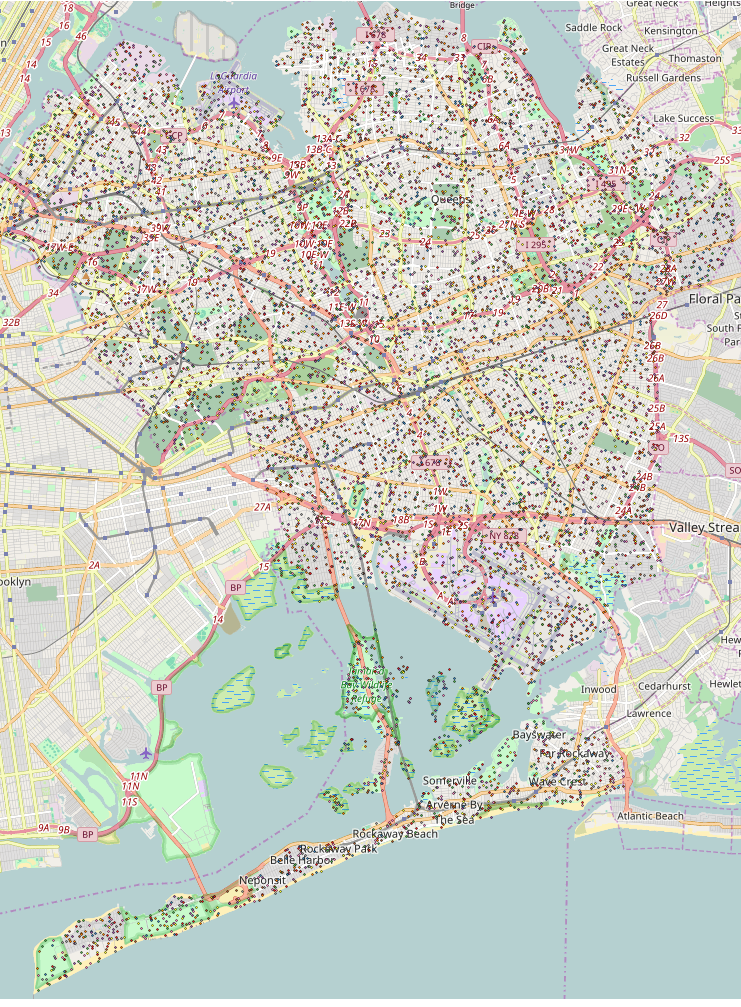

In [82]:
from IPython.display import Image
Image("../figures/queens_10000.png")

In [83]:
gpd.GeoSeries(points).to_file('../data/10000_points_queens.geojson', driver='GeoJSON')

In [84]:
b = boroughs.iloc[2]['BoroName']
geo = boroughs.iloc[2]['geometry']
b_bb = geo.bounds
point_lists.append([])
points = []
while len(points) < 10000:
    r_lat = b_bb[1] + random.random() * (b_bb[3] - b_bb[1])
    r_long = b_bb[0] + random.random() * (b_bb[2] - b_bb[0])
    if geo.contains(shapely.geometry.Point(r_long, r_lat)):
        points.append(shapely.geometry.Point(r_long, r_lat))

In [85]:
gpd.GeoSeries(points).to_file('../data/10000_points_brooklyn.geojson', driver='GeoJSON')

In [96]:
b = boroughs.iloc[3]['BoroName']
geo = boroughs.iloc[3]['geometry']
b_bb = geo.bounds
point_lists.append([])
points = []
while len(points) < 10000:
    r_lat = b_bb[1] + random.random() * (b_bb[3] - b_bb[1])
    r_long = b_bb[0] + random.random() * (b_bb[2] - b_bb[0])
    if geo.contains(shapely.geometry.Point(r_long, r_lat)):
        points.append(shapely.geometry.Point(r_long, r_lat))

In [97]:
gpd.GeoSeries(points).plot()
mplleaflet.show()

In [100]:
gpd.GeoSeries(points).to_file('../data/10000_points_manhattan.geojson', driver='GeoJSON')

In [88]:
b = boroughs.iloc[4]['BoroName']
geo = boroughs.iloc[4]['geometry']
b_bb = geo.bounds
point_lists.append([])
points = []
while len(points) < 10000:
    r_lat = b_bb[1] + random.random() * (b_bb[3] - b_bb[1])
    r_long = b_bb[0] + random.random() * (b_bb[2] - b_bb[0])
    if geo.contains(shapely.geometry.Point(r_long, r_lat)):
        points.append(shapely.geometry.Point(r_long, r_lat))

In [90]:
gpd.GeoSeries(points).to_file('../data/10000_points_bronx.geojson', driver='GeoJSON')

In [91]:
gpd.GeoSeries(points).plot()
mplleaflet.show()

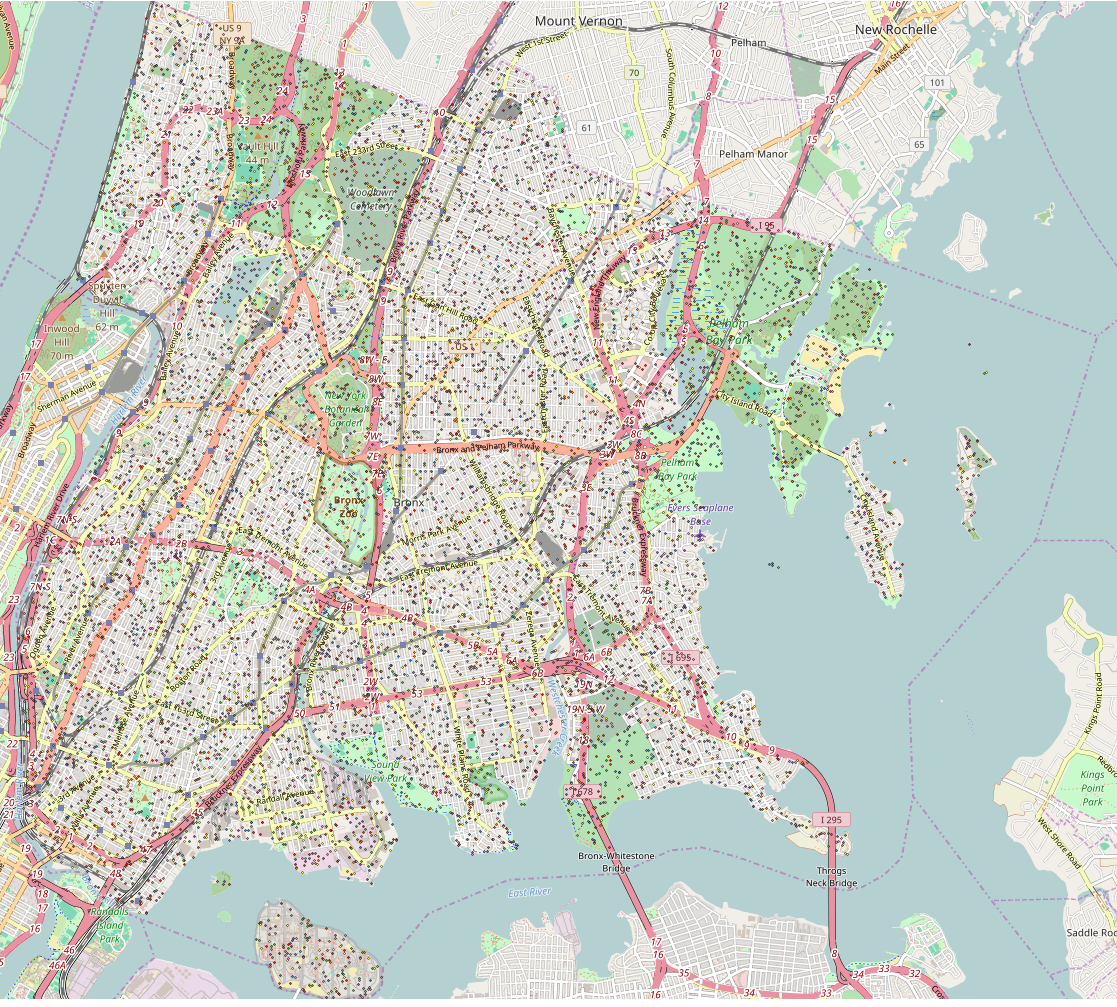

In [93]:
Image("../figures/bronx_10000.png")